# Data product guide

- `{country}_buildings.parquet`
- `{country}_morphotopes.parquet`
- `label_name.json`
- `pen_portraits.json`
- `cluster_median_chars_200.parquet` - ???
- `morphotope_labels.parquet` - building to morphotope mapping
- `morphotope_data.parquet` - all characters for non-outlier morphotopes - used to build the taxonomy
- `ward_linkage.npy`
- `data/primary_chars_{region_id}.parquet` - TODO: needs to be linkable buildings - tricky now given it is organised by region

To add:

- region boundaries to go along the data

In [1]:
import numpy as np
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# set to a local or cloud directory
data_product_dir = '/data/uscuni-ulce/data_product/'

## Plotting building data

The results from the clustering are assigned to buildings and are stored in ``{country}_buildings.parquet``. The data has the following columns:
- ``geometry`` - the geometry of the building.
- ``morph`` - the morphotope, the building falls into.
- ``initially_noise`` - whether the morphotope and the building were initially noise and assigned to a cluster later.
- ``level_1_label`` - the level 1 classiffication of the building, corresponding to a cut of the hierarchy of 2500.
- ``level_2_label`` - the level 2 classiffication of the building, corresponding to a cut of the hierarchy of 1600.
- ``level_3_label`` - the level 3 classiffication of the building, corresponding to a cut of the hierarchy of 1000.
- ``level_4_label`` - the level 4 classiffication of the building, corresponding to a cut of the hierarchy of 700.
- ``level_5_label`` - the level 5 classiffication of the building, corresponding to a cut of the hierarchy of 500.
- ``level_6_label`` - the level 6 classiffication of the building, corresponding to a cut of the hierarchy of 300.
- ``level_7_label`` - the level 7 classiffication of the building, corresponding to a cut of the hierarchy of 200.

You can quickly search the file using the bounding boxes in the ``epsg:4236`` projection.

In [3]:
%%time
buildings_subset = gpd.read_parquet(f'{data_product_dir}czechia_buildings.parquet', bbox=(14.367886,50.092613,14.414921,50.112102))

CPU times: user 639 ms, sys: 525 ms, total: 1.16 s
Wall time: 419 ms


<Axes: >

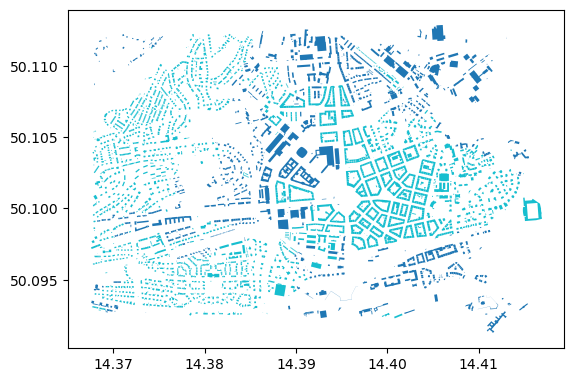

In [4]:
buildings_subset.plot(column='level_1_label', categorical=True)

## Taxonomic tree

The data for the taxonomic tree - ``ward_linkage_10.npy`` - is in ``scipy.cluster.hierarchical.linkage`` format. 

The input data for the taxonomy is a subset of morphotopes and their characteristics. Only extreme outliers were dropped from the full morphotope list when producing the taxonomy.

The standardised data used to product the taxonomy is ``cluster_input_data.parquet``.

The clustering algorithm used to produce is hierarchical Ward, based on a knn_graph with 10 neighbours. The standardised data used to product the taxonomy is ``cluster_input_data.parquet``.

In [5]:
linkage_matrix = np.load('/data/uscuni-ulce/data_product/ward_linkage_10.npy')

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbSqu,ssbERI,ssbElo,libNCo,ldbPWL,ltcBuA,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
4_0_1,0.987137,1.433775,-0.003262,-1.949620,-0.424706,0.483494,-2.019151,-0.08234,0.208525,0.081287,...,-1.315770,0.462303,-0.613538,0.493512,1.521773,1.521773,3.654263,4.850005,0.149898,3.887056
4_0_10,0.999498,1.196410,-0.003262,-0.789406,-0.342916,0.486163,-1.535531,-0.08234,0.182541,-0.233554,...,-0.153381,0.395069,0.056334,0.486932,1.216988,1.216988,1.178967,1.099998,0.149898,0.893068
4_0_100,-0.137159,-0.163803,-0.003262,-0.466113,-0.366240,-0.856290,0.731951,-0.08234,-0.106013,-0.458441,...,-0.521085,-0.580478,-0.558703,-0.081649,-0.032863,-0.032863,-0.203994,-0.233173,0.149898,-0.317867
4_0_101,-0.459409,-0.503755,-0.003262,0.343387,-0.298401,0.174042,0.749521,-0.08234,0.061081,-1.357987,...,-0.639787,-1.158760,-1.204788,0.178917,0.258876,0.258876,-0.310458,-0.336999,0.149898,-0.233568
4_0_102,2.676117,2.777188,-0.003262,-3.146540,-0.373569,0.244430,-2.962140,-0.08234,0.327391,0.081287,...,-2.175354,0.401162,-1.384519,0.805433,1.585684,1.585684,0.688806,0.228241,0.149898,0.615805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152511_809_0,0.378060,0.452225,-0.003262,0.986065,-0.155806,-0.260933,1.028036,-0.08234,-0.345792,1.340653,...,1.064571,0.742462,1.252631,-0.467798,-0.553549,-0.553549,-0.185301,-0.115341,0.149898,-0.399705
152511_8_0,0.288760,0.448556,-0.003262,-0.052106,-0.203213,0.491686,-0.223015,-0.08234,-0.356453,1.340653,...,0.193617,0.842279,0.855323,-0.447989,-0.568171,-0.568171,-0.077163,-0.033948,0.149898,-0.351100
152511_8_1,0.493941,0.612191,-0.003262,0.223337,-0.193634,-1.845646,0.758600,-0.08234,-0.345008,1.340653,...,0.903872,0.536746,0.971907,-0.478463,-0.501992,-0.501992,0.078303,-0.074908,0.149898,-0.265919
152511_8_2,0.603987,0.717053,-0.003262,0.284544,-0.195905,0.488063,-0.253222,-0.08234,-0.333686,1.340653,...,0.153683,0.840281,1.026858,-0.438514,-0.445666,-0.445666,-0.183356,-0.211640,0.149898,-0.405401


Since the linkage matrix is large - around 500,000 observations - we do not plot labels

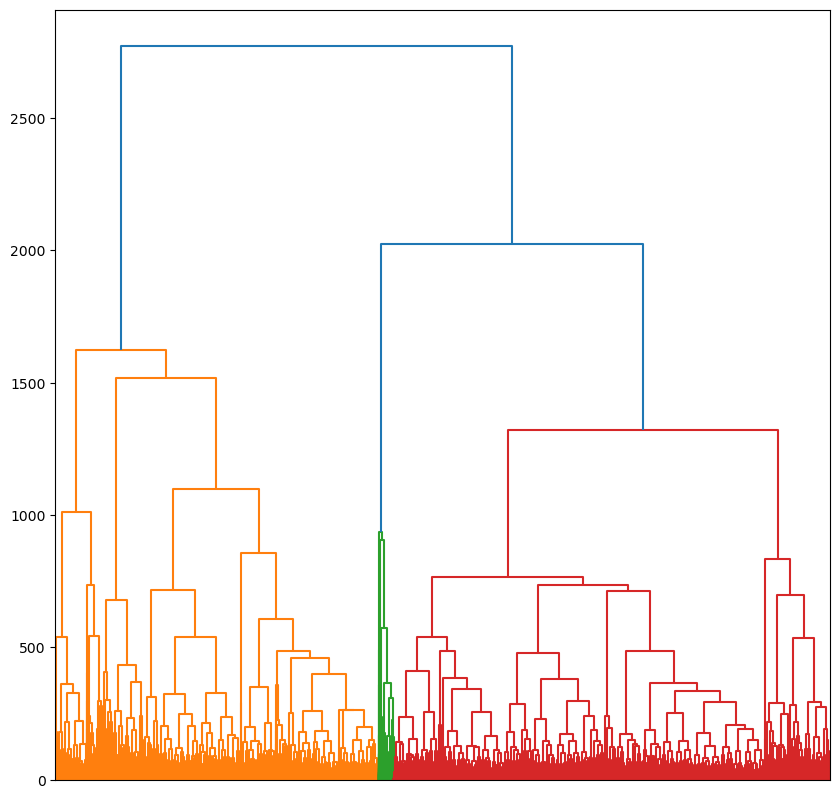

In [8]:
## final dendrogram
fig,ax = plt.subplots(figsize=(10,10))
_ = dendrogram(linkage_matrix,ax=ax, no_labels=True)

You can use fcluster to cut it at arbitrary values.

In [9]:
cutoffs = [1000, 1600, 2500]

cluster_frame = []
for c in cutoffs:
    clusters = fcluster(linkage_matrix, t=c, criterion='distance')
    cluster_frame.append(pd.Series(clusters))

cluster_frame = pd.concat(cluster_frame, axis=1)
cluster_frame.columns = cutoffs
cluster_frame.index = cluster_input_data.index
cluster_frame.head()

,1000,1600,2500
4_0_1,1,1,1
4_0_10,1,1,1
4_0_100,7,4,2
4_0_101,7,4,2
4_0_102,1,1,1


## Linking the new cuts to the buildings

You have to link back the cluster to the buildings to plot using the morphotope ID. Some buildings are not part of morphotopes, or are part of outlier morphotopes. They come out as NA in the mapping, and they have to be handled seperately. 

In [10]:
new_clusters = buildings_subset.morph.map(cluster_frame[1000].to_dict())

<Axes: >

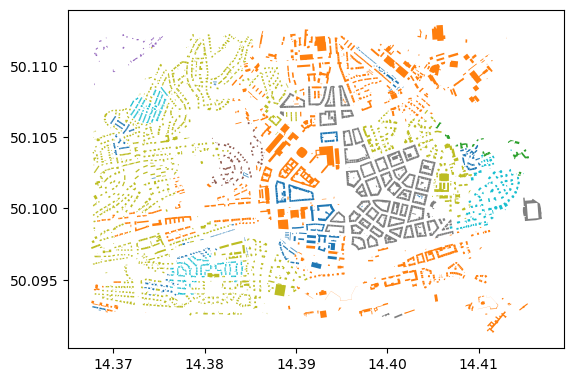

In [11]:
buildings_subset.plot(column=new_clusters.fillna(-1), categorical=True)

In this case we are mapping the morphotopes to a cut that exists, so we can verify the results


In [12]:
from pandas.testing import assert_series_equal

# drop outliers and noise and compare only morphotopes that are part of the clustering
new_assignment = new_clusters.dropna().astype(int)
old_assignment = buildings_subset.loc[~buildings_subset.initially_noise, 'level_3_label']

assert_series_equal(new_assignment, old_assignment, check_names=False)

## Handling noise and outliers

The easiest way to deal with outliers is to use the buildings.parquet file,  the initially noise column and the lowest level to the custom cut.

In [13]:
mapping_level = 'level_7_label'

In [14]:
# create a dictionary that maps the old assignemnts at the specified level to the new cluster values
new_assignment_mapping = new_assignment.drop_duplicates()
new_assignment_mapping = pd.Series(new_assignment_mapping.values, buildings_subset.loc[new_assignment_mapping.index, mapping_level])
new_assignment_mapping

level_7_label
6      1
77     7
102    8
73     6
47     5
18     2
40     4
dtype: int64

In [15]:
new_noise = new_clusters[new_clusters.isna()].index
new_clusters.loc[new_noise] = buildings_subset.loc[new_noise, mapping_level].map(new_assignment_mapping)

<Axes: >

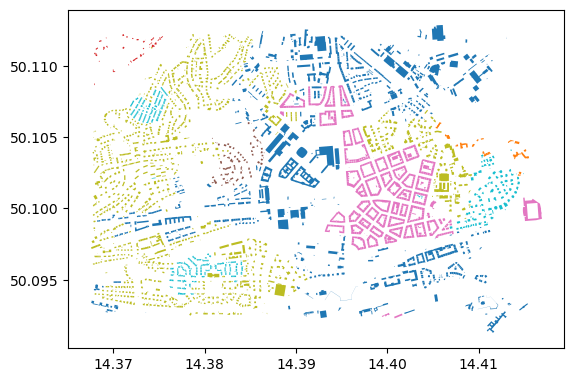

In [16]:
buildings_subset.plot(column=new_clusters, categorical=True)

Alternatively you can create a custom noise assignment function directly using the morphological characteristics in the ``/data/`` folder.

## Data

In [6]:
morphotope_data = pd.read_parquet('/data/uscuni-ulce/data_product/morphotope_data.parquet')
morphotope_data.head()

## Naming clusters & branches

## Interactive exploration